In [1]:
## Bring in needed mod
import pandas as pd, numpy as np

## Bring in matplot lib
from matplotlib import pyplot as plt
%matplotlib inline

## Set coloring and background
plt.style.use('tableau-colorblind10')

In [2]:
## set path to file, should in in the words, "curation_baselined.csv'
file_path = '../FILES/Tecan-ssk1KO_baselined.csv'

In [262]:
## Bring in data
df = pd.read_csv(file_path,index_col=0)

In [263]:
df.background.unique()

array(['431', 'XL280a', 'none', 'XL280alpha', 'JEC21'], dtype=object)

In [4]:
## Take column names
dfcols = df.columns.tolist()

In [5]:
## Get time start index
timeix = dfcols.index('0s')

In [27]:
## Get time columns
timepts = dfcols[timeix:]
timex = np.array([int(t[:-1])/(60**2) for t in timepts])

In [7]:
## Get info columns
infos = dfcols[:timeix]

In [8]:
## Check baselining
assert df[timepts[:7]].sum(axis=1).sum() == 0

In [9]:
## Write ftn for median filtering
def median_filter(Y,Kernal,padtype=None,recursive=False):
    window = int((Kernal-1)/2)
    Y = np.array(Y)
    assert len(Y[~np.isnan(Y)]) == len(Y)
    if padtype is None:
        rb = np.ones(window)*Y[0]
        re = np.ones(window)*Y[-1]
    elif padtype is 'Zero':
        rb = np.zeros(window)
        re = np.zeros(window)
    elif padtype is 'Ref':
        rb = list(Y[0] - Y[::-1] + Y[0])[-(window+1):-1]
        re = list(Y[-1] - Y[::-1] + Y[-1])[1:(window+1)]
    else:
        rb = np.zeros(window)
        re = np.ones(window)*Y[-1]
    pry = np.concatenate([rb,Y,re])
    if recursive:
        for i in np.arange(window,len(pry)-window):
            pry[i] = np.median(pry[i-window:i+window+1])
        my = pry[window:-window]
    else:
        my = np.array([np.median(pry[i-window:i+window+1]) for i in np.arange(window,len(pry)-window)])
    return my

In [203]:
df[(df.background=='XL280a')].groupby(['strain','study','compare','amphB','temp']).count()

date  row  column  background  plate  \
strain study    compare   amphB temp                                         
4a-6   current  Dec182019 0.000 30       3    3       3           3      3   
                          0.125 30       9    9       9           9      9   
                Dec62019  0.000 30       3    3       3           3      3   
                          0.125 30       9    9       9           9      9   
4b-2   current  Dec182019 0.000 30       3    3       3           3      3   
                          0.125 30       9    9       9           9      9   
                Dec62019  0.000 30       3    3       3           3      3   
                          0.125 30       9    9       9           9      9   
5a-8   current  Dec182019 0.000 30       3    3       3           3      3   
                          0.125 30       9    9       9           9      9   
                Dec62019  0.000 30       3    3       3           3      3   
                          0.125 30       9    9       9           9      9   
5b-1   current  Dec182019 0.000 30       3    3       3           3      3   
                          0.125 30       9    9       9           9      9   
                Dec62019  0.000 30       3    3       3           3      3   
                          0.125 30       9    9       9           9      9   
XL F   current  Dec182019 0.000 30       3    3       3           3      3   
                          0.125 30       9    9       9           9      9   
                Dec62019  0.000 30       3    3       3           3      3   
                          0.125 30       9    9       9           9      9   
XL280a current  Dec182019 0.000 30       3    3       3           3      3   
                          0.125 30       9    9       9           9      9   
                Dec62019  0.000 30       3    3       3           3      3   
                          0.125 30       9    9       9           9      9   
       previous previous  0.000 30       4    4       4           4      4   
                          0.125 30       4    4       4           4      4   

                                      instrument  0s  900s  1801s  2700s  ...  \
strain study    compare   amphB temp                                      ...   
4a-6   current  Dec182019 0.000 30             3   3     3      3      3  ...   
                          0.125 30             9   9     9      9      9  ...   
                Dec62019  0.000 30             3   3     3      3      3  ...   
                          0.125 30             9   9     9      9      9  ...   
4b-2   current  Dec182019 0.000 30             3   3     3      3      3  ...   
                          0.125 30             9   9     9      9      9  ...   
                Dec62019  0.000 30             3   3     3      3      3  ...   
                          0.125 30             9   9     9      9      9  ...   
5a-8   current  Dec182019 0.000 30             3   3     3      3      3  ...   
                          0.125 30             9   9     9      9      9  ...   
                Dec62019  0.000 30             3   3     3      3      3  ...   
                          0.125 30             9   9     9      9      9  ...   
5b-1   current  Dec182019 0.000 30             3   3     3      3      3  ...   
                          0.125 30             9   9     9      9      9  ...   
                Dec62019  0.000 30             3   3     3      3      3  ...   
                          0.125 30             9   9     9      9      9  ...   
XL F   current  Dec182019 0.000 30             3   3     3      3      3  ...   
                          0.125 30             9   9     9      9      9  ...   
                Dec62019  0.000 30             3   3     3      3      3  ...   
                          0.125 30             9   9     9      9      9  ...   
XL280a current  Dec182019 0.000 30             3   3     3      3      

In [261]:
df.background.unique()

array(['431', 'XL280a', 'none', 'XL280alpha', 'JEC21'], dtype=object)

In [257]:
test = df[(df.background=='H99') & (df.amphB==0.125) & (df.compare.isin(['Dec182019']))].copy()

In [258]:
test['AUC'] = test[timepts].sum(axis=1)*dx

In [259]:
import seaborn as sns

In [233]:
temp.strain.unique()

array(['XL280a', '4a-6', '4b-2', '5a-8', '5b-1', 'XL F'], dtype=object)

In [265]:
temp[(temp.strain=='XL280a') & (temp.study=='current') &
                  (temp.amphB!=0)][timepts].shape

(9, 289)

In [266]:
def curveplot(df,timex,ax,color='k',alpha=0.5,z=1.96,label=None):
    plt.sca(ax)
    
    m = df.mean().values
    std = df.std(ddof=1).values
    
    ci95_hi = m + ((z*std)/np.math.sqrt(df.shape[0]))
    ci95_lo = m - ((z*std)/np.math.sqrt(df.shape[0]))
    plt.fill_between(timex, ci95_hi, ci95_lo, 
             alpha=alpha-0.25)
    plt.plot(timex,m,label=label,alpha=alpha)

In [267]:
temp.strain.unique()[1:-1]

array(['4a-6', '4b-2', '5a-8', '5b-1'], dtype=object)

In [269]:
df.T[XL280_p.index].T

,date,row,column,strain,background,study,compare,plate,temp,amphB,...,251100s,252000s,252901s,253800s,254700s,255601s,256500s,257400s,258301s,259200s
421,Jan302018,e,6,XL280a,XL280a,previous,previous,qtl2,30,0.125,...,0.6704,0.6584,0.6714,0.7804,0.7874,0.7784,0.7844,0.7774,0.7844,0.7784
422,Feb152018,e,6,XL280a,XL280a,previous,previous,qtl2,30,0.125,...,0.5784,0.5774,0.5764,0.5794,0.5804,0.5794,0.5814,0.5824,0.5824,0.5834
423,Feb182018,e,6,XL280a,XL280a,previous,previous,qtl2,30,0.125,...,0.5386,0.5376,0.5366,0.5396,0.5366,0.5376,0.5376,0.5396,0.5386,0.5386
424,Mar112018,e,6,XL280a,XL280a,previous,previous,qtl2,30,0.125,...,1.0696,1.0696,1.0696,1.0686,1.0706,1.0706,1.0706,1.0706,1.0716,1.0716


In [272]:
xl280r

,0s,900s,1801s,2700s,3600s,4501s,5400s,6300s,7201s,8100s,...,251100s,252000s,252901s,253800s,254700s,255601s,256500s,257400s,258301s,259200s


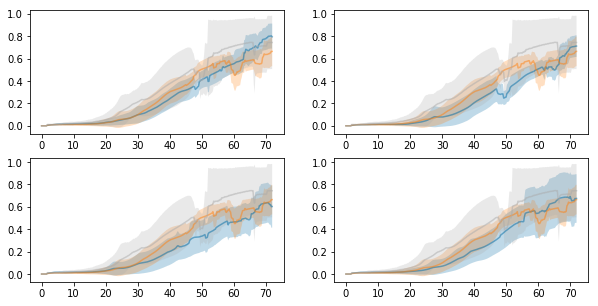

In [275]:
temp = df[(df.compare=='Dec182019') & (df.background=='XL280a')]

fig,ax = plt.subplots(2,2,figsize=(10,5))

xl280p = df[(df.compare=='previous') & 
            (df.strain=='XL280a') & (df.amphB==0.125)][timepts]
xl280r = temp[(temp.strain=='XL280a') & 
            (temp.amphB==0.125)][timepts]
for i,strain in enumerate(temp.strain.unique()[1:-1]):
    az = ax.ravel()[i]
    curveplot(temp[(temp.strain==strain) & 
                   (temp.amphB==0.125)][timepts],timex,az)
    
    curveplot(xl280r,timex,az)
    curveplot(xl280p,timex,az)

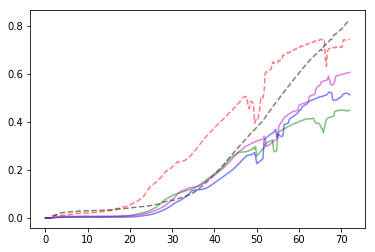

In [214]:


plt.plot(timex,,color='r',alpha=0.5,linestyle='--');

plt.plot(timex,temp[(temp.strain=='XL280a') & (temp.study=='current') &
                  (temp.amphB!=0)][timepts].mean().values,color='k',alpha=0.5,linestyle='--');

plt.plot(timex,temp[(temp.strain=='5b-1') & (temp.amphB==0.125)][timepts].mean(),color='g',alpha=0.5);
plt.plot(timex,temp[(temp.strain=='5a-8') & (temp.amphB==0.125)][timepts].mean(),color='b',alpha=0.5);
plt.plot(timex,temp[(temp.strain=='4b-2') & (temp.amphB==0.125)][timepts].mean(),color='m',alpha=0.5);

In [122]:
dx = np.round(np.max(np.diff(timex)),2)

In [123]:
test.index

Int64Index([429, 430, 431, 432], dtype='int64')

In [152]:
kss = np.arange(0,200,1)

In [163]:
testy = test[timepts].T[429].values
for i in range(1000):
    testy = median_filter(testy,3)

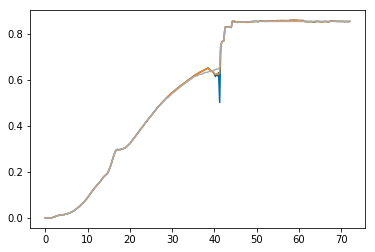

In [171]:
plt.plot(timex,test[timepts].T[429].values)
plt.plot(timex,testy);
plt.plot(timex,median_filter(test[timepts].T[429].values,100));

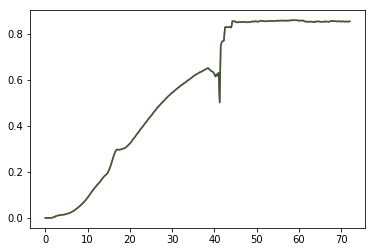

In [156]:
plt.plot(timex,testy);
plt.plot(timex,median_filter(testy,np.min(kss[ys == np.min(ys)])),'r',alpha=0.5)
plt.plot(timex,median_filter(testy,np.min(kss)),'g',alpha=0.5);

In [13]:
df[(df.strain=='XL280a') & (df.study=='current')].shape

(24, 300)

In [10]:
## Set kerneal zise to 10 time points (1.5 hrs), around a given pt
ks = 51
## Median filter the data via the awesome ftn I wrote above! 
mdf = df[timepts].T.apply(median_filter,args=[ks]).T

In [11]:
## add info dataframe
mdfi = pd.concat([df[infos],mdf],axis=1)

In [12]:
mdfi.amphB.unique()

array([0.125, 0.   ])

In [13]:
## Check the parental strain SS-A837, at 37°C with 0.125 ug/ml Amph. B.
_431ix = mdfi[(mdfi.background=='431')].index.tolist()

In [14]:
mdfi.T[_431ix].T.strain.unique()

array(['431', '1a-1', '1a-12', '431 F'], dtype=object)

In [15]:
comdf = mdfi[['compare','temp','amphB']].drop_duplicates().sort_values(['amphB']).reset_index(drop=True).copy()

In [16]:
comdf

,compare,temp,amphB
0,Dec62019,30,0.000
1,previous,30,0.000
2,Dec182019,30,0.000
3,Dec62019,30,0.125
4,previous,30,0.125
5,Dec182019,30,0.125


In [17]:
mdfi.background.unique()

array(['431', 'XL280a', 'none', 'XL280alpha', 'JEC21'], dtype=object)

In [18]:
unique_strains = mdfi.strain.unique()

In [19]:
mdfi = mdfi.sort_values(['background','strain','compare'])

In [20]:
mdfi.head()

,date,row,column,strain,background,study,compare,plate,temp,amphB,...,251100s,252000s,252901s,253800s,254700s,255601s,256500s,257400s,258301s,259200s
498,Dec182019,b,4,1a-1,431,current,Dec182019,ssk1KO 2a,30,0.125,...,1.1038,1.1038,1.1038,1.1038,1.1038,1.1038,1.1038,1.1038,1.1038,1.1038
512,Dec182019,c,6,1a-1,431,current,Dec182019,ssk1KO 2a,30,0.125,...,1.1868,1.1868,1.1868,1.1868,1.1868,1.1868,1.1878,1.1878,1.1878,1.1878
525,Dec182019,d,7,1a-1,431,current,Dec182019,ssk1KO 2a,30,0.125,...,1.1854,1.1854,1.1864,1.1864,1.1864,1.1864,1.1864,1.1864,1.1864,1.1864
604,Dec182019,b,4,1a-1,431,current,Dec182019,ssk1KO 2b,30,0.125,...,1.0672,1.0672,1.0672,1.0672,1.0672,1.0672,1.0672,1.0672,1.0672,1.0672
621,Dec182019,c,6,1a-1,431,current,Dec182019,ssk1KO 2b,30,0.125,...,1.0662,1.0662,1.0662,1.0662,1.0662,1.0662,1.0662,1.0662,1.0662,1.0662


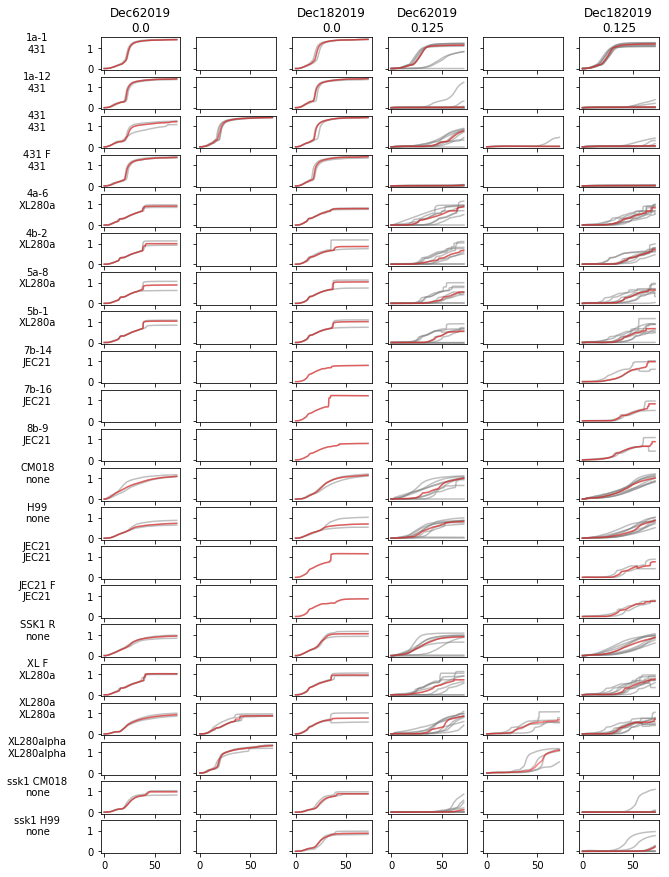

In [22]:
fig,ax = plt.subplots(unique_strains.shape[0],
                      comdf.shape[0],
                      figsize=(10,15),
                      sharex=True,sharey=True)
c = 0
for i,j in mdfi.groupby('strain'):
    
    plt.sca(ax[c,0])
    plt.ylabel(i+'\n'+j.background.unique()[0],
               rotation=0,labelpad=50)
    
    for l,k in j.groupby(['compare','amphB']):
        
        z = comdf[(comdf.compare==k.compare.unique()[0]) & 
                  (comdf.amphB==k.amphB.unique()[0])].index[0]
        plt.sca(ax[c,z])
        plt.title(str(k.compare.unique()[0])+'\n'+str(k.amphB.unique()[0] ) if c == 0 else None)
        plt.plot(timex,k[timepts].T,color='grey',alpha=0.5)
        plt.plot(timex,k[timepts].median(axis=0).values,
                 color='r',alpha=0.5)
    c = c+1

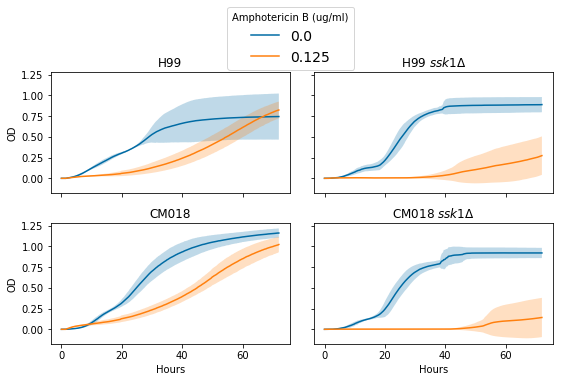

In [24]:
fig, ax = plt.subplots(2,2,figsize=(9,5),sharex=True,sharey=True)
h99 = mdfi[(mdfi.strain=='H99') & (mdfi.compare=='Dec182019')]
plt.sca(ax[0,0])
z = 1.96
plt.title('H99')
for i,a in enumerate(sorted(h99.amphB.unique())):
    
    m = h99[(h99.amphB==a)][timepts].mean().values
    std = h99[(h99.amphB==a)][timepts].std(ddof=1).values
    
    ci95_hi = m + ((z*std)/np.math.sqrt(h99[(h99.amphB==a)].shape[0]))
    ci95_lo = m - ((z*std)/np.math.sqrt(h99[(h99.amphB==a)].shape[0]))
    plt.fill_between(timex, ci95_hi, ci95_lo, 
             alpha=0.25)
    plt.plot(timex,m);
    
    
plt.ylabel('OD')

plt.sca(ax[0,1])
plt.title('H99 $ssk1$\u0394')
h99k = mdfi[(mdfi.strain=='ssk1 H99') & (mdfi.compare=='Dec182019')]
for i,a in enumerate(sorted(h99.amphB.unique())):
    
    m = h99k[(h99k.amphB==a)][timepts].mean().values
    std = h99k[(h99k.amphB==a)][timepts].std(ddof=1).values
    
    ci95_hi = m + ((z*std)/np.math.sqrt(h99k[(h99k.amphB==a)].shape[0]))
    ci95_lo = m - ((z*std)/np.math.sqrt(h99k[(h99k.amphB==a)].shape[0]))
    plt.fill_between(timex, ci95_hi, ci95_lo, 
             alpha=0.25)
    plt.plot(timex,m,label=a);
    
    
    
plt.legend(title='Amphotericin B (ug/ml)',fontsize=14,bbox_to_anchor=(.2,1.6));

    

h99 = mdfi[(mdfi.strain=='CM018') & (mdfi.compare=='Dec182019')]
plt.sca(ax[1,0])
plt.title('CM018')
for i,a in enumerate(sorted(h99.amphB.unique())):
    m = h99[(h99.amphB==a)][timepts].mean().values
    std = h99[(h99.amphB==a)][timepts].std(ddof=1).values
    
    ci95_hi = m + ((z*std)/np.math.sqrt(h99[(h99.amphB==a)].shape[0]))
    ci95_lo = m - ((z*std)/np.math.sqrt(h99[(h99.amphB==a)].shape[0]))
    plt.fill_between(timex, ci95_hi, ci95_lo, 
             alpha=0.25)
    plt.plot(timex,m);
    
    
    
plt.ylabel('OD')
plt.xlabel('Hours')
    
h99k = mdfi[(mdfi.strain=='ssk1 CM018') & (mdfi.compare=='Dec182019')]
plt.sca(ax[1,1])
plt.title('CM018 $ssk1$\u0394')
for i,a in enumerate(sorted(h99.amphB.unique())):
    m = h99k[(h99k.amphB==a)][timepts].mean().values
    std = h99k[(h99k.amphB==a)][timepts].std(ddof=1).values
    
    ci95_hi = m + ((z*std)/np.math.sqrt(h99k[(h99k.amphB==a)].shape[0]))
    ci95_lo = m - ((z*std)/np.math.sqrt(h99k[(h99k.amphB==a)].shape[0]))
    plt.fill_between(timex, ci95_hi, ci95_lo, 
             alpha=0.25)
    plt.plot(timex,m)

plt.xlabel('Hours')
    
plt.subplots_adjust(wspace=0.1,hspace=0.25)
plt.savefig('../FIGURES/H99_CM018_ssk1_amphb.png',dpi=150,bbox_inches='tight');

In [25]:
dt = np.round(np.max(np.diff(timex)),3)

In [26]:
mdfi['AUC'] = mdfi[timepts].sum(axis=1)*dt

In [27]:
import seaborn as sns

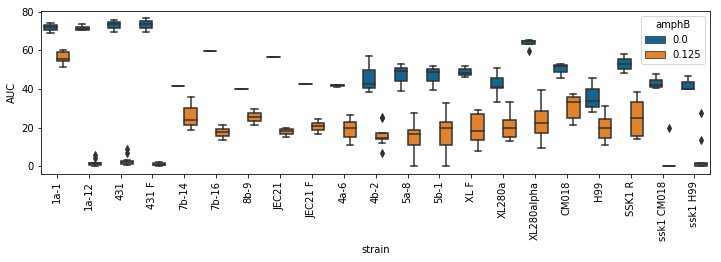

In [28]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
sns.boxplot(x='strain',y='AUC',hue='amphB',data=mdfi[(mdfi.compare!='Dec62019')])
plt.xticks(rotation=90);

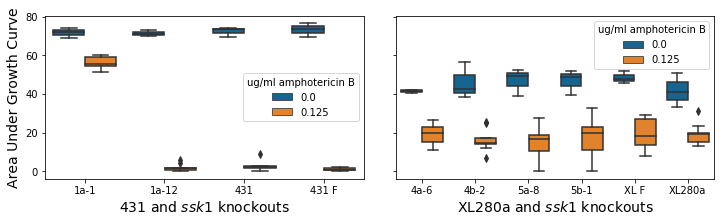

In [29]:
fig,ax=plt.subplots(1,2,figsize=(12,3),sharey=True)
plt.sca(ax[0])
sns.boxplot(x='strain',y='AUC',hue='amphB',
            data=mdfi[(mdfi.background=='431')&
                      (mdfi.compare=='Dec182019')])
plt.xlabel('431 and $ssk1$ knockouts',fontsize=14)
plt.ylabel('Area Under Growth Curve',fontsize=14)
plt.legend(title='ug/ml amphotericin B')


plt.sca(ax[1])
sns.boxplot(x='strain',y='AUC',hue='amphB',
            data=mdfi[(mdfi.background=='XL280a')&
                      (mdfi.compare=='Dec182019')])
plt.xlabel('XL280a and $ssk1$ knockouts',fontsize=14)
plt.ylabel(' ')
plt.legend(title='ug/ml amphotericin B')

plt.subplots_adjust(wspace=0.1)
plt.savefig('../FIGURES/431_XL280_ssk1_knockouts.png',
            dpi=150,bbox_inches='tight');
#plt.xticks(rotation=90);

In [30]:
xl280=mdfi[(mdfi.background=='XL280a')& (mdfi.strain!='XL F') &
                      (mdfi.compare=='Dec182019')]
_431=mdfi[(mdfi.background=='431')& (mdfi.strain!='431 F') &
                      (mdfi.compare=='Dec182019')]

In [31]:
from matplotlib import rc
_xllabelal = 'XL280'+r'$\alpha$'#+'SS'
_xllabel = 'XL280' +r'$\bf{a}$'
_431label = '431'+r'$\mathrm{\alpha}$'

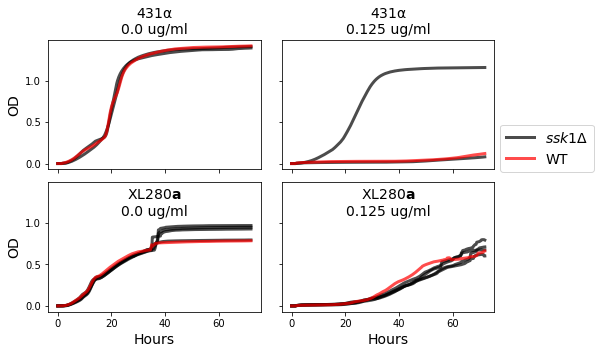

In [32]:
fig,ax = plt.subplots(2,2,figsize=(8,5),sharey=True,sharex=True)
plt.sca(ax[0,0])
plt.plot(timex,_431[(_431.amphB==0) & 
                    (_431.strain!='431')
                   ].groupby(['strain']).agg(np.mean)[
    timepts].T,color='k',alpha=0.7,linewidth=3);

plt.plot(timex,_431[(_431.amphB==0) & 
                    (_431.strain=='431')
                   ].groupby(['strain']).agg(np.mean)[
    timepts].T,color='r',alpha=0.7,linewidth=3);
plt.ylabel('OD',fontsize=14)
plt.title(_431label + '\n0.0 ug/ml',fontsize=14)

plt.sca(ax[0,1])
plt.plot(timex,_431[(_431.amphB==0.125) & 
                    (_431.strain!='431')
                   ].groupby(['strain']).agg(np.mean)[
    timepts].T,color='k',alpha=0.7,linewidth=3);

plt.plot(timex,_431[(_431.amphB==0.125) & 
                    (_431.strain=='431')
                   ].groupby(['strain']).agg(np.mean)[
    timepts].T,color='r',alpha=0.7,linewidth=3);
plt.title(_431label + '\n0.125 ug/ml',fontsize=14)


plt.sca(ax[1,0])
plt.plot(timex,xl280[(xl280.amphB==0) & 
                     (xl280.strain!='XL280a')
                    ].groupby(['strain']).agg(np.mean)[
    timepts].T,color='k',alpha=0.7,linewidth=3);

plt.plot(timex,xl280[(xl280.amphB==0) & 
                     (xl280.strain=='XL280a')
                    ].groupby(['strain']).agg(np.mean)[
    timepts].T,color='r',alpha=0.7,linewidth=3);
plt.xlabel('Hours',fontsize=14)
plt.ylabel('OD',fontsize=14)
plt.title(_xllabel + '\n0.0 ug/ml',y=0.7,fontsize=14)

plt.sca(ax[1,1])
plt.plot(timex,xl280[(xl280.amphB==0.125)& 
                     (xl280.strain=='4a-6')
                    ].groupby(['strain']).agg(np.mean)[
    timepts].T,color='k',alpha=0.7,linewidth=3,label='$ssk1$\u0394');

plt.plot(timex,xl280[(xl280.amphB==0.125)& 
                     ~(xl280.strain.isin(['XL280a','4a-6']))
                    ].groupby(['strain']).agg(np.mean)[
    timepts].T,color='k',alpha=0.7,linewidth=3);

plt.plot(timex,xl280[(xl280.amphB==0.125) & 
                     (xl280.strain=='XL280a')
                    ].groupby(['strain']).agg(np.mean)[
    timepts].T,color='r',alpha=0.7,linewidth=3,label='WT');
plt.legend(fontsize=14,bbox_to_anchor=(1.5,1.5))
plt.xlabel('Hours',fontsize=14);
plt.title(_xllabel + '\n0.125 ug/ml',y=0.7,fontsize=14)



plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig('../FIGURES/XL280a_431_ssk1_knockouts.png',
            dpi=300,bbox_inches='tight');

In [33]:
xl280.strain.unique()[::-1]

array(['XL280a', '5b-1', '5a-8', '4b-2', '4a-6'], dtype=object)

In [34]:
_431.strain.unique()[::-1]

array(['431', '1a-12', '1a-1'], dtype=object)

In [42]:
k.shape[0]

9

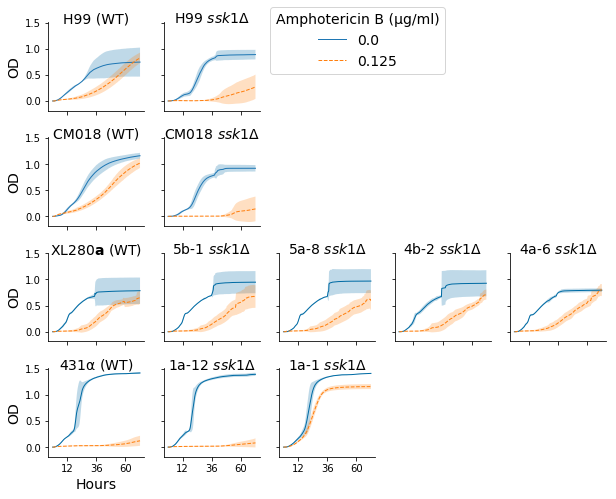

In [78]:
fig,ax = plt.subplots(4,5,figsize=(10,8),sharey=True,sharex=True)
z = 1.96

h99 = mdfi[(mdfi.strain=='H99') & (mdfi.compare=='Dec182019')]
plt.sca(ax[0,0])
z = 1.96
plt.title('H99 (WT)', fontsize=14,y=.92)
for i,a in enumerate(sorted(h99.amphB.unique())):
    
    m = h99[(h99.amphB==a)][timepts].mean().values
    std = h99[(h99.amphB==a)][timepts].std(ddof=1).values
    
    ci95_hi = m + ((z*std)/np.math.sqrt(h99[(h99.amphB==a)].shape[0]))
    ci95_lo = m - ((z*std)/np.math.sqrt(h99[(h99.amphB==a)].shape[0]))
    plt.fill_between(timex, ci95_hi, ci95_lo, 
             alpha=0.25)
    plt.plot(timex,m,linewidth=1,
             color='tab:blue' if a == 0.0 else 'tab:orange',
             linestyle= '-' if a == 0.0 else '--');
    
    
plt.ylabel('OD',fontsize=14)

plt.sca(ax[0,1])
plt.title('H99 $ssk1$\u0394',  fontsize=14,y=.92)
h99k = mdfi[(mdfi.strain=='ssk1 H99') & (mdfi.compare=='Dec182019')]
for i,a in enumerate(sorted(h99.amphB.unique())):
    
    m = h99k[(h99k.amphB==a)][timepts].mean().values
    std = h99k[(h99k.amphB==a)][timepts].std(ddof=1).values
    
    ci95_hi = m + ((z*std)/np.math.sqrt(h99k[(h99k.amphB==a)].shape[0]))
    ci95_lo = m - ((z*std)/np.math.sqrt(h99k[(h99k.amphB==a)].shape[0]))
    plt.fill_between(timex, ci95_hi, ci95_lo, 
             alpha=0.25)
    plt.plot(timex,m,label=a,linewidth=1,
             color='tab:blue' if a == 0.0 else 'tab:orange',
             linestyle= '-' if a == 0.0 else '--');
    
    
legend = plt.legend(title='Amphotericin B (\u03BCg/ml)',fontsize=14,
           bbox_to_anchor=(3,1.25));
plt.setp(legend.get_title(),fontsize=14)

    

h99 = mdfi[(mdfi.strain=='CM018') & (mdfi.compare=='Dec182019')]
plt.sca(ax[1,0])
plt.title('CM018 (WT)', fontsize=14,y=.92)
for i,a in enumerate(sorted(h99.amphB.unique())):
    m = h99[(h99.amphB==a)][timepts].mean().values
    std = h99[(h99.amphB==a)][timepts].std(ddof=1).values
    
    ci95_hi = m + ((z*std)/np.math.sqrt(h99[(h99.amphB==a)].shape[0]))
    ci95_lo = m - ((z*std)/np.math.sqrt(h99[(h99.amphB==a)].shape[0]))
    plt.fill_between(timex, ci95_hi, ci95_lo, 
             alpha=0.25)
    plt.plot(timex,m,linewidth=1,
             color='tab:blue' if a == 0.0 else 'tab:orange',
             linestyle= '-' if a == 0.0 else '--');
    
    
    
plt.ylabel('OD',fontsize=14)
#plt.xlabel('Hours')
    
h99k = mdfi[(mdfi.strain=='ssk1 CM018') & (mdfi.compare=='Dec182019')]
plt.sca(ax[1,1])
plt.title('CM018 $ssk1$\u0394', fontsize=14,y=.92)
for i,a in enumerate(sorted(h99.amphB.unique())):
    m = h99k[(h99k.amphB==a)][timepts].mean().values
    std = h99k[(h99k.amphB==a)][timepts].std(ddof=1).values
    
    ci95_hi = m + ((z*std)/np.math.sqrt(h99k[(h99k.amphB==a)].shape[0]))
    ci95_lo = m - ((z*std)/np.math.sqrt(h99k[(h99k.amphB==a)].shape[0]))
    plt.fill_between(timex, ci95_hi, ci95_lo, 
             alpha=0.25)
    plt.plot(timex,m,linewidth=1,
             color='tab:blue' if a == 0.0 else 'tab:orange',
             linestyle= '-' if a == 0.0 else '--');

## ------------------------------------------------------ ##


for i, s in enumerate(xl280.strain.unique()[::-1]):
    ts = xl280[(xl280.strain==s)]
    plt.sca(ax[2,i])
    plt.ylabel('OD' if i == 0 else None,fontsize=14)
    plt.xticks([12,36,60])
    plt.title(_xllabel + ' (WT)' if s == 'XL280a' else s + u' $ssk1$\u0394',
              fontsize=14,y=.92)
    
    for j,k in ts.groupby('amphB'):
        
        m = k[timepts].mean()
        std = k[timepts].std(ddof=1).values
    
        ci95_hi = m + ((z*std)/np.math.sqrt(k.shape[0]))
        ci95_lo = m - ((z*std)/np.math.sqrt(k.shape[0]))
        
        plt.fill_between(timex, ci95_lo, ci95_hi, alpha=0.25)
        plt.plot(timex,m,
                 linestyle='-' if j == 0.0 else '--',
                 label = '%s (ug/ml)'%j, linewidth=1)
        
        
for i, s in enumerate(_431.strain.unique()[::-1]):
    ts = _431[(_431.strain==s)]
    plt.sca(ax[3,i])
    plt.ylabel('OD' if i == 0 else None,fontsize=14)
    plt.xlabel('Hours' if i == 0 else None,fontsize=14)
    plt.xticks([12,36,60])
    plt.title(_431label  + ' (WT)' if s == '431' else s + ' $ssk1$\u0394',
             fontsize=14,y=.92)
    
    for j,k in ts.groupby('amphB'):
        m = k[timepts].mean()
        std = k[timepts].std(ddof=1).values
    
        ci95_hi = m + ((z*std)/np.math.sqrt(k.shape[0]))
        ci95_lo = m - ((z*std)/np.math.sqrt(k.shape[0]))
        
        plt.fill_between(timex, ci95_hi, ci95_lo, alpha=0.25)
        plt.plot(timex,m,
                 linestyle='-' if j == 0.0 else '--',
                 label = '%s (ug/ml)'%j,linewidth=1)
#plt.legend(title='Amphotericin B',bbox_to_anchor=(1.1,1),fontsize=14)

qs = [[2,3,4],[2,3,4],[3,4]]
for i,q in enumerate([0,1,3]):
    axs = qs[i]
    for p in axs:
        plt.sca(ax[q,p]);plt.axis('off');
    
plt.subplots_adjust(hspace=0.3)

for i in range(5*4):
    
    plt.sca(ax.ravel()[i])
    
    ap = plt.gca()
    [ap.spines[t].set_visible(False) for t in ['top','right']]
    
plt.savefig('../FIGURES/Crypto_ssk1_knockouts.png',
            dpi=300,bbox_inches='tight');

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
tempdf = mdfi[(mdfi.background.isin(['XL280a'])) & (mdfi.compare=='Dec182019')]

In [53]:
olsm = ols('AUC ~ amphB*C(strain)',data=tempdf).fit()

In [54]:
sm.stats.anova_lm(olsm,type=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(strain),5.0,89.129053,17.825811,0.342005,8.853836e-01
amphB,1.0,10150.339029,10150.339029,194.743742,1.693066e-20
amphB:C(strain),5.0,165.365535,33.073107,0.634538,6.741217e-01
Residual,60.0,3127.290951,52.121516,NaN,NaN


In [45]:
olsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AUC   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     33.69
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           3.79e-18
Time:                        15:17:49   Log-Likelihood:                -239.78
No. Observations:                  72   AIC:                             493.6
Df Residuals:                      65   BIC:                             509.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              45.0590      2.516     17.906      0.000      40.033      50.085
C(strain)[T.4b-2]      -0.8229      2.906     -0.283      0.778      -6.626       4.980
C(strain)[T.5a-8]      -0.9638      2.906     -0.332      0.741      -6.767       4.839
C(strain)[T.5b-1]       0.2959      2.906      0.102      0.919      -5.507       6.099
C(strain)[T.XL F]       2.4260      2.906      0.835      0.407      -3.377       8.229
C(strain)[T.XL280a]     0.3534      2.906      0.122      0.904      -5.450       6.156
amphB                -219.3630     15.497    -14.155      0.000    -250.312    -188.414
==============================================================================
Omnibus:                        0.141   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.178
Skew:                          -0.098   Prob(JB):                        0.915
Kurtosis:                       2.856   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

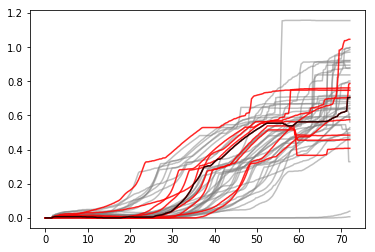

In [151]:
plt.plot(timex,
         mdfi[(mdfi.background=='XL280a') & 
              (mdfi.strain!='XL280a') & (mdfi.amphB==0.125) &  
              (mdfi.compare=='Dec182019') & (mdfi.strain!='XL F')][timepts].T.values,color='grey',alpha=0.5);
plt.plot(timex,
         mdfi[(mdfi.strain=='XL280a') & (mdfi.amphB==0.125) &  
              (mdfi.compare=='Dec182019')][timepts].T.values,alpha=0.85,color='r');

plt.plot(timex,
         mdfi[(mdfi.strain=='XL280a') & (mdfi.amphB==0.125) &  
              (mdfi.compare=='Dec182019')][timepts].median().values,alpha=0.85,color='k');

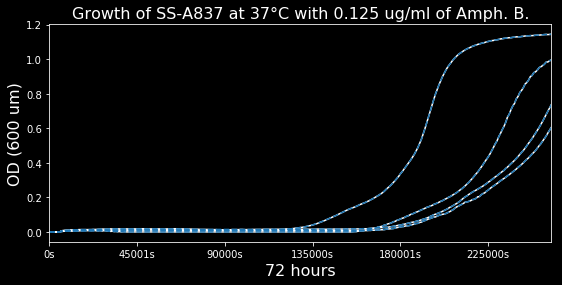

In [25]:
## Plot the parental strain SS-A837
fig, ax = plt.subplots(1,1,figsize=(9,4))
df.loc[SS_A837_37_0125_ix,timepts].T.plot(color='w',
                        legend=None,ax=ax);
mdfi.loc[SS_A837_37_0125_ix,timepts].T.plot(color='tab:blue',
                linestyle='--',legend=None,ax=ax);
plt.xlabel('72 hours',fontsize=16);
plt.ylabel('OD (600 um)',fontsize=16);
plt.title(u'Growth of SS-A837 at 37°C with 0.125 ug/ml of Amph. B.',
          fontsize=16);

In [19]:
## Save dataframe
mdfi.to_csv('../FILES/'+file_path.split('/')[-1
            ].split('.csv')[0]+'_median%s.csv'%(ks))

In [20]:
'../FILES/'+file_path.split('/')[-1
            ].split('.csv')[0]+'_median%s.csv'%(ks)

'../FILES/Tecan_qtlruns_Jan162019_curated_baselined_median51.csv'

In [21]:
temp = df[(df.strain=='XL280a') & (df.amphB==0.125) & (df.temp==30)]

In [22]:
temp

,date,row,column,plate,temp,strain,amphB,length,Instrument,saturatedOD,...,249300s,250201s,251100s,252000s,252901s,253800s,254700s,255601s,256500s,257400s
1372,Jan302018,e,6,2,30,XL280a,0.125,72,Sunrise,1.4892,...,0.6694,0.6584,0.6704,0.6584,0.6714,0.7804,0.7874,0.7784,0.7844,0.7774
1373,Feb152018,e,6,2,30,XL280a,0.125,72,Sunrise,1.7634,...,0.5784,0.5784,0.5784,0.5774,0.5764,0.5794,0.5804,0.5794,0.5814,0.5824
1374,Feb182018,e,6,2,30,XL280a,0.125,72,Moon,1.8957,...,0.5376,0.5396,0.5386,0.5376,0.5366,0.5396,0.5366,0.5376,0.5376,0.5396
1375,Mar112018,e,6,2,30,XL280a,0.125,72,Sunrise,1.8111,...,1.0686,1.0686,1.0696,1.0696,1.0696,1.0686,1.0706,1.0706,1.0706,1.0706
